In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/deep_learning_final/

/content/gdrive/.shortcut-targets-by-id/1-aSo27sCkvpv1t0Chi1UhLGCWLt7TSr5/deep_learning_final


In [ ]:
%ls

final.h5  test_predict/  train/  val/


In [ ]:
train_dir ='train/'
val_dir='val/'

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
input_shape = (224, 224, 3)

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=input_shape[:2], batch_size=32, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_dir, target_size=input_shape[:2], batch_size=32, class_mode='categorical')

Found 560 images belonging to 5 classes.
Found 150 images belonging to 5 classes.


In [ ]:
input_layer = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(256, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
person_output = Dense(5, activation='softmax', name='person_output')(x)
gender_output = Dense(5, activation='softmax', name='gender_output')(x)

# Define the model
model = Model(inputs=input_layer, outputs=[person_output, gender_output])

In [ ]:
model.compile(optimizer='adam',
              loss={'person_output': 'categorical_crossentropy',
                    'gender_output': 'categorical_crossentropy'},
              metrics={'person_output': 'accuracy',
                       'gender_output': 'accuracy'})

In [ ]:
callbacks = [tf.keras.callbacks.ModelCheckpoint(filepath='model_final.h5', monitor='val_person_output_accuracy',mode="max",verbose=1, save_best_only=True),
            tf.keras.callbacks.EarlyStopping(monitor='val_person_output_accuracy', patience=10)]

In [ ]:
model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=100,
          validation_data=val_generator,
          validation_steps=len(val_generator),
          callbacks=callbacks)

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 3.1933 - person_output_loss: 1.5991 - gender_output_loss: 1.5942 - person_output_accuracy: 0.2661 - gender_output_accuracy: 0.2536
Epoch 1: val_person_output_accuracy improved from -inf to 0.26667, saving model to model_final.h5
18/18 [==============================] - 229s 12s/step - loss: 3.1933 - person_output_loss: 1.5991 - gender_output_loss: 1.5942 - person_output_accuracy: 0.2661 - gender_output_accuracy: 0.2536 - val_loss: 3.1769 - val_person_output_loss: 1.5926 - val_gender_output_loss: 1.5843 - val_person_output_accuracy: 0.2667 - val_gender_output_accuracy: 0.2067
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 2.5964 - person_output_loss: 1.3008 - gender_output_loss: 1.2957 - person_output_accuracy: 0.4482 - gender_output_accuracy: 0.4929
Epoch 2: val_person_output_accuracy improved from 0.26667 to 0.32667, saving model to model_final.h5
18/18 [==============================] - 22s 1s/

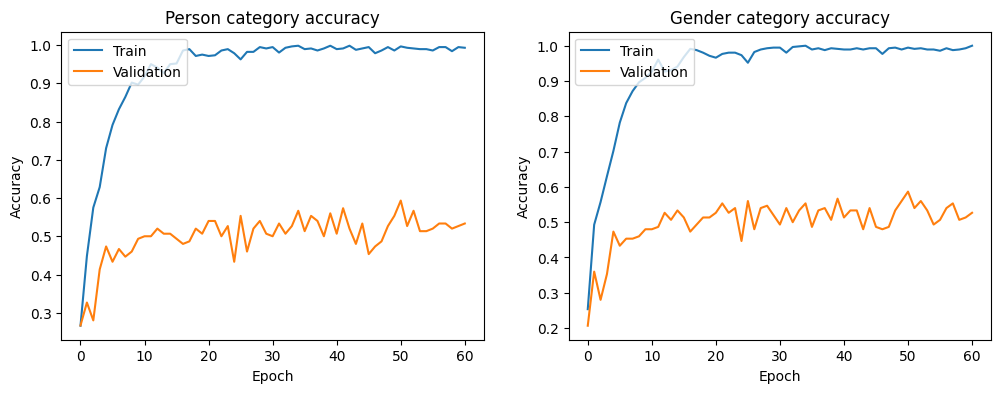

In [ ]:
import matplotlib.pyplot as plt
# Get training history
history = model.history.history

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot accuracy for person category
axs[0].plot(history['person_output_accuracy'])
axs[0].plot(history['val_person_output_accuracy'])
axs[0].set_title('Person category accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'], loc='upper left')

# Plot accuracy for gender category
axs[1].plot(history['gender_output_accuracy'])
axs[1].plot(history['val_gender_output_accuracy'])
axs[1].set_title('Gender category accuracy')
axs[1].set_ylabel('Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
%cd test_predict/

/content/gdrive/.shortcut-targets-by-id/1-aSo27sCkvpv1t0Chi1UhLGCWLt7TSr5/deep_learning_final/test_predict


In [ ]:
%ls

benadeth_1.jpg   ghea_1.JPG  mahendra_1.jpg  raihan_1.jpeg  rizky_1.jpg
bernadeth_2.jpg  ghea_2.JPG  mahendra_2.jpg  raihan_2.jpeg  rizky_2.jpg
bernadeth_3.jpg  ghea_3.JPG  mahendra_3.jpg  raihan_3.jpeg  rizky_3.jpg
bernadeth_4.jpg  ghea_4.JPG  mahendra_4.jpg  raihan_4.jpeg  rizky_4.jpg
bernadeth_5.jpg  ghea_5.JPG  mahendra_5.jpg  raihan_5.jpeg  rizky_5.jpg


1/1 [==============================] - 0s 21ms/step


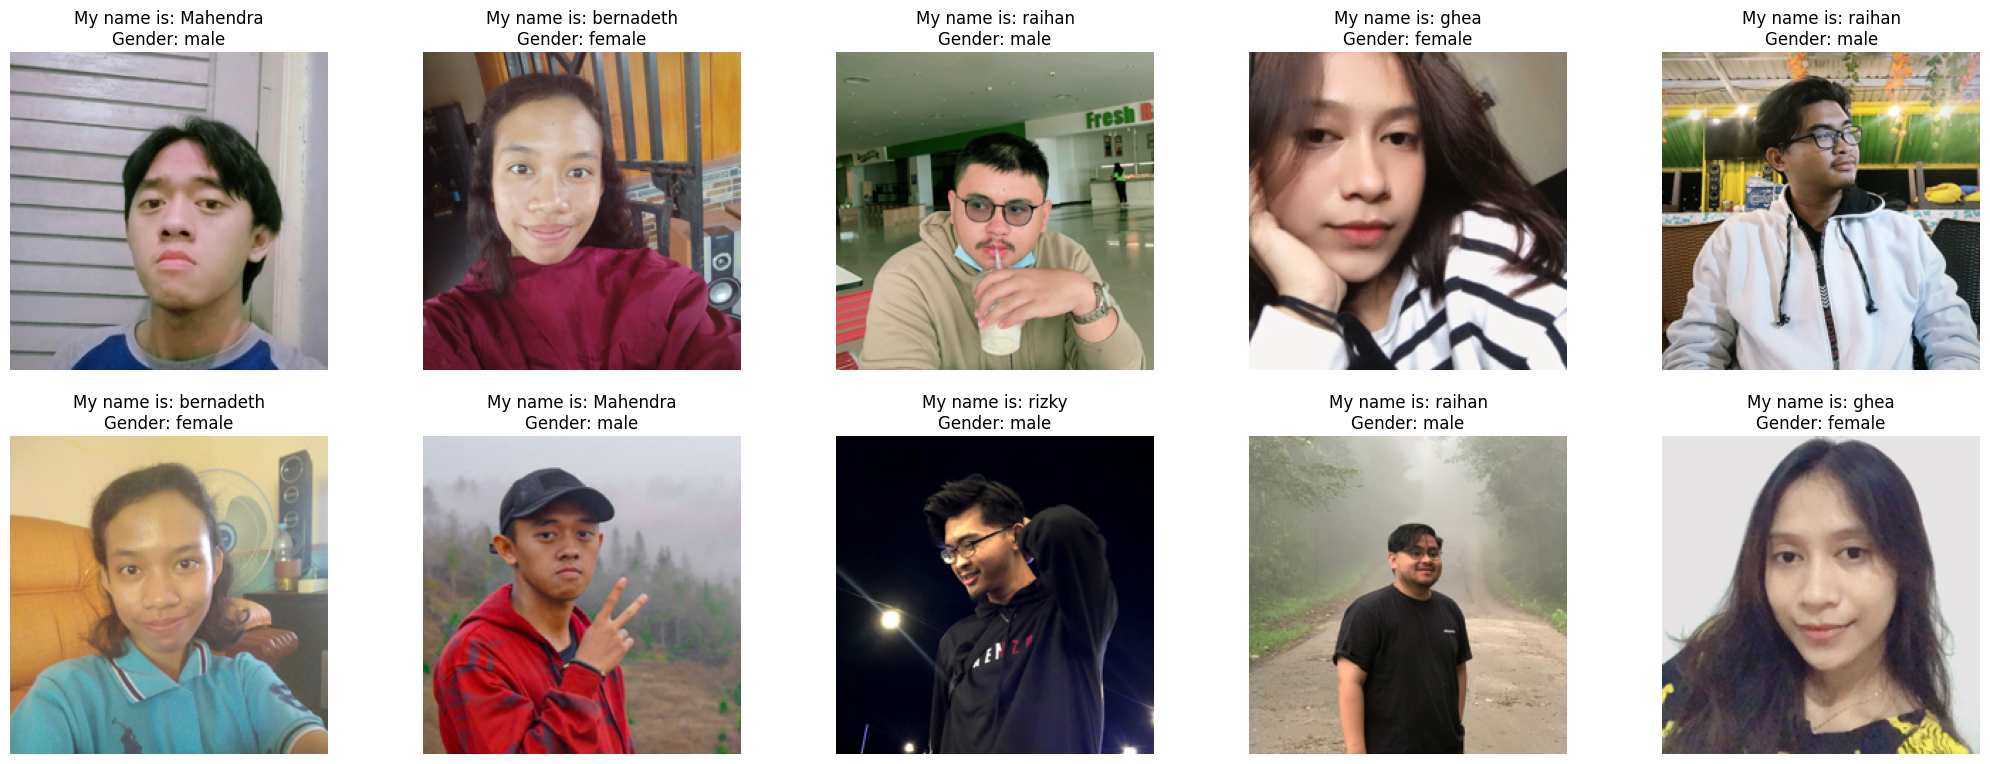

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define list of image paths to be predicted
img_paths = ['mahendra_4.jpg', 'bernadeth_3.jpg', 'raihan_2.jpeg', 'ghea_3.JPG','rizky_4.jpg',
             'bernadeth_2.jpg','mahendra_2.jpg', 'rizky_3.jpg', 'raihan_4.jpeg', 'ghea_5.JPG']

# Load images and predict person and gender for each image
person_names = ['bernadeth', 'ghea','Mahendra', 'raihan','rizky']
gender_names = ['female', 'female','male','male','male']

# Define number of rows and columns for image grid
nrows = int(np.ceil(len(img_paths) / 5))
ncols = 5

# Create figure object and set size
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4))

# Loop through each image and plot on corresponding axis
for i, img_path in enumerate(img_paths):
    img = Image.open(img_path)
    img = img.resize((224, 224))
    x = np.asarray(img, dtype=np.float32)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0
    person_pred, gender_pred = model.predict(x)
    person_label = np.argmax(person_pred, axis=1)
    gender_label = np.argmax(gender_pred, axis=1)
    row_idx = i // ncols
    col_idx = i % ncols
    ax = axes[row_idx, col_idx]
    ax.imshow(img)
    ax.set_title('My name is: {}\nGender: {}'.format(person_names[person_label[0]], gender_names[gender_label[0]]), fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.1)
plt.show()